In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import random

# linear Regression

In [4]:
df=pd.read_csv('Pecan.csv')

In [5]:
df.head()

,Water per acre,Salinity level,Fertilizer per acre,Pecan Production
0,68.138954,45.916165,42.896806,406.064207
1,79.907342,42.998570,49.763432,442.476260
2,75.301620,43.715734,48.242166,433.672569
3,91.255560,35.568128,53.779698,467.941026
4,100.998049,24.689234,50.967590,510.038689


In [6]:
df.describe()

,Water per acre,Salinity level,Fertilizer per acre,Pecan Production
count,56.000000,56.000000,56.000000,56.000000
mean,78.503944,39.349646,47.315059,441.385708
std,20.986367,16.069264,10.586451,74.455611
min,40.998794,12.000000,25.084457,310.236118
25%,60.586761,24.996564,39.821125,370.442887
50%,77.604481,42.137588,48.150501,452.780972
75%,95.905961,51.540401,56.026447,506.624053
max,115.559116,67.090446,68.562183,553.700922


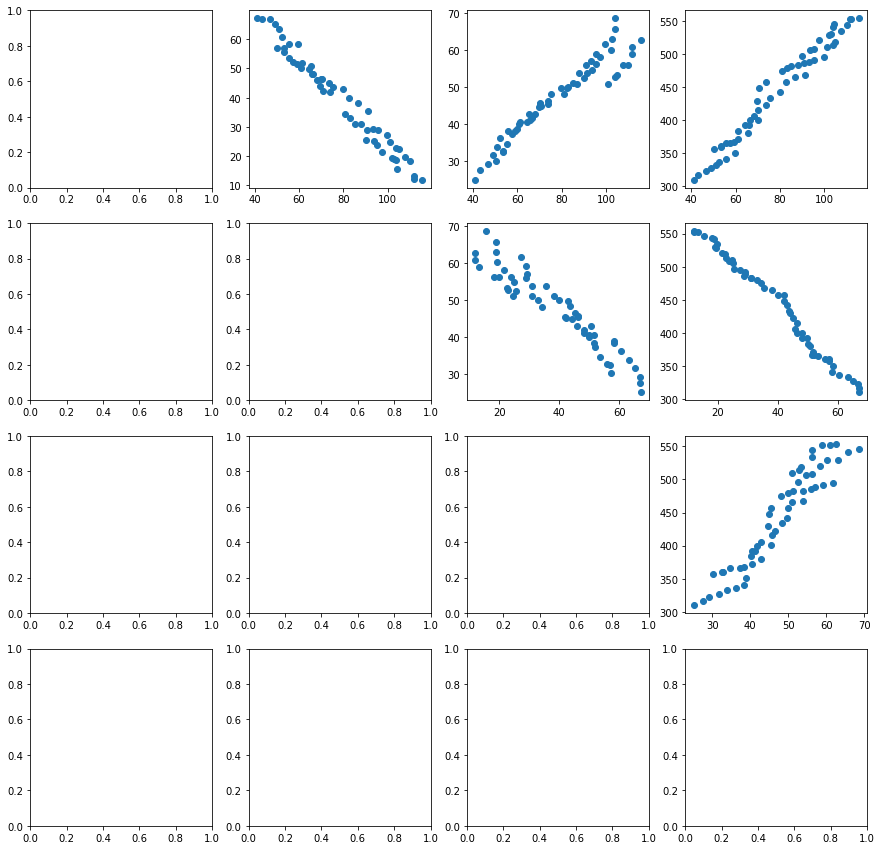

In [7]:
r=df.shape[1]
c=df.shape[1]
fig,axes=plt.subplots(r,c,figsize=(15,15))
for i in range(df.shape[1]):
    for j in range(df.shape[1]):
        if j<=i:
            continue
        else:
            axes[i,j].scatter(df.iloc[:,i],df.iloc[:,j])
    

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Water per acre       56 non-null     float64
 1   Salinity level       56 non-null     float64
 2   Fertilizer per acre  56 non-null     float64
 3   Pecan Production     56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB


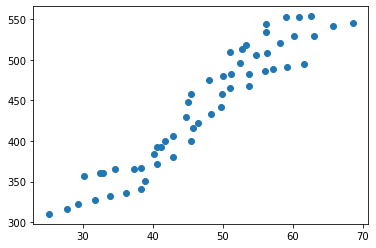

Correlation coefficient: 0.9525396583143433


In [9]:
plt.scatter(df['Fertilizer per acre'],df['Pecan Production'])
plt.show()
# calculate the correlation coefficient between x and y
corr = df['Fertilizer per acre'].corr(df['Pecan Production'])
print("Correlation coefficient:", corr)

In [10]:
x=df.values[:,range(0,3)]

In [11]:
x.shape

(56, 3)

In [12]:
y=df.values[:,3]

In [13]:
y.shape

(56,)

In [14]:
model=LinearRegression().fit(x,y)

In [15]:
print(model.coef_)

[ 0.81272313 -3.30151539  0.39332994]


In [16]:
print(model.intercept_)

488.88676981057176


In [17]:
model.score(x,y)

0.9851191373931043

# Logistic Regression

In [18]:
df=pd.read_csv('Social_Network_Ads .csv')

In [19]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

In [21]:
df.groupby('Gender')['Purchased'].sum()

Gender
Female    77
Male      66
Name: Purchased, dtype: int64

In [22]:
h=range(18,61)
r=pd.DataFrame(h)


In [23]:
m=pd.DataFrame(df.groupby('Age')['Purchased'].sum())


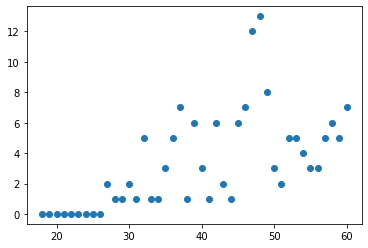

In [24]:
plt.scatter(r,m)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [26]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)
print(x_train.shape)
print(x_test.shape)

(300, 2)
(100, 2)


In [27]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [28]:
y_pred=classifier.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
show=pd.DataFrame(cm,columns=['yes','no'],index=['yes','no'])
show.head()

,yes,no
yes,65,3
no,8,24


# K_nearst neighbor Classification

In [30]:
df=pd.read_csv('Classified Data.csv')

In [31]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [32]:
df.columns

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


In [34]:
df.describe()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,288.819436,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.000000,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,249.750000,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,499.500000,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,749.250000,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,999.000000,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [35]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [37]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [38]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [39]:
from sklearn.model_selection import train_test_split
x=df_feat
y=df['TARGET CLASS']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [41]:
pred=knn.predict(x_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
coaf_mat=confusion_matrix(y_test,pred)
print(coaf_mat)

[[92 13]
 [10 85]]


In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       105
           1       0.87      0.89      0.88        95

    accuracy                           0.89       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



# svm (support vector machine)


In [44]:
from sklearn.datasets import load_breast_cancer

In [45]:
cancer=load_breast_cancer()

In [46]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0